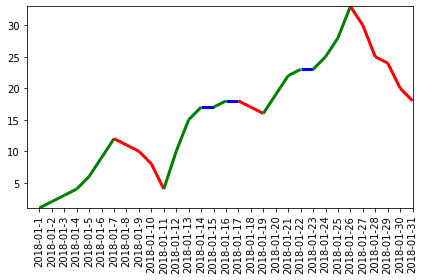

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import datetime

max_range = 32
dates = ['2018-01-{}'.format(d) for d in range(1, max_range)]
x = np.asarray(range(1,max_range))
y = [1, 2, 3, 4, 6, 9, 12, 11, 10, 8, 4, 10, 15, 17, 17, 18, 18, 17, 16, 19, 22, 23, 23, 25, 28, 33, 30, 25, 24,
        20, 18]
y = np.asarray(y)
z = [i - j for i, j in zip(y[:-1], y[1:])]
z = np.asarray(z)

# Create a colormap for red, green and blue and a norm to color
# f' < -0.5 red, f' > 0.5 blue, and the rest green
cmap = ListedColormap(['g', 'b', 'r'])
norm = BoundaryNorm([-100, -0.5, 0.5, 100], cmap.N)

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be numlines x points per line x 2 (x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the line collection object, setting the colormapping parameters.
# Have to set the actual values used for colormapping separately.
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(z)
lc.set_linewidth(3)

fig1 = plt.figure()
plt.gca().add_collection(lc)
plt.xlim(0,max_range-1)
plt.ylim(min(y), max(y))
plt.xticks(x,dates, rotation='vertical')
plt.tight_layout()
plt.show()